# WALRUS Demand Prediction and Strategy Optimization

## Executive Summary:

In this comprehensive analysis, we focused on predicting demand at WALRUS art gallery, leveraging this dataset as each row represents a sale. Our goal was to derive actionable insights. Here are the key findings:

## 1. Market Demand Insights:

- **Sales Trends:**
  - Strong markets exhibit significantly higher average sales counts compared to weak markets, with normal markets falling in between.
  - Noteworthy is the consistency of sales in normal markets, indicating a more stable demand pattern.

- **Price Analysis:**
  - Average prices remain relatively consistent across market strengths, with slight variations.
  - T-tests confirm that the differences in average prices and standard deviations are not statistically significant.

- **Days on Market:**
  - Strong and normal markets show a significant decrease in the average number of days on the market compared to weak markets.
  - Efficient sales and inventory management are evident in strong and normal markets but there is potential for further optimizations.

## 2. Adjusting Ideal Minimum Stock Totals:

- **Scaling Factors:**
  - Introduced market strength and confidence level multipliers for refining the ideal mimimum stock totals to meet the expected demand.
  - Results showcase nuanced and realistic adjusted stock totals tailored to predictions based on past market conditions.

- **Business Implications:**
  - Acknowledging market dynamics and confidence levels in calculations enhances cost-efficiency and profitability.
  - Ongoing fine-tuning of factors based on observations is recommended.
    
## 3. Pricing Strategy and Potential Profits:

- **Ideal Confidence Levels:**
  - Simulated sales scenarios indicate that using a confidence level could lead to higher potential profits. As I do not have information on the cost of carrying overhead, more information is required to properly assess. The lower the cost, the higher the confidence level recommended. It can also be increased when spikes in demand are expected.
  - The analysis emphasizes the significance of considering confidence levels in pricing strategy.

- **Profitability Insights:**
  - Strong market demand presents the opportunity for substantial profits.
  - Weak market demand, while yielding lower profits, still offers valuable insights for strategic decision-making and targeted, smaller inventory levels.

## 4. Operational Considerations and Strategic Decision-Making:

- **Efficiency and Strategy:**
  - Understanding market demand's influence on sales and days on market is crucial for operational efficiency.
  - Strong and normal market demands suggest efficient sales and inventory management, while weak market demand may require adjustments.

- **Strategic Guidance:**
  - The analysis provides valuable strategic guidance for inventory management, helping align operations with market demands.

## 5. Recommendations:

- **Continuous Monitoring:**
  - Ongoing monitoring of market trends and confidence level impacts is essential for adaptive inventory strategies.

- **External Factors:**
  - Consideration of external factors influencing the art market could further enhance the robustness of future analyses.

## Conclusion:

This analysis offers a holistic view of predicting demand at WALRUS art gallery, emphasizing the importance of market dynamics and confidence levels. The insights provided serve as a strategic guide for optimizing operations, maximizing profitability, and ensuring the gallery's long-term success.

We look forward to discussing these findings further and exploring ways to implement these insights for the continued success of WALRUS art gallery. 

---
## Introduction

In this optimization project, the objective is to strategically manage inventory levels based on market strength and demand prediction. Efficient inventory management is crucial for maximizing profits and minimizing costs.

**Note:** The dataset used is simulated sales data for the WALRUS art gallery. I did not use the real data to preserve the privacy of the artists. Artist names have been replaced with identification numbers. The simulated values are close approximations to the real sales trends I experienced while operating this gallery.

This notebook is designed for potential employers to assess my proficiency in data exploration and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.optimize import minimize

# Set the style for visualizations
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('WALRUS_soldinventory_clean.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Date_Sold,Artist,Price,Intake_Date,Month,Quarter,Days_on_Market,Price_Range,Artist_Contribution,Dollars_per_Day
0,0,2022-04-02,46,6625,2021-09-06,4,2022Q2,208,1000+,0.042509,31.850962
1,1,2022-03-26,5,6520,2021-11-22,3,2022Q1,124,1000+,0.105882,52.580645
2,2,2021-06-13,45,6420,2020-07-10,6,2021Q2,338,1000+,0.074930,18.994083
3,3,2022-08-05,46,6190,2021-08-15,8,2022Q3,355,1000+,0.039718,17.436620
4,4,2023-02-18,35,5740,2022-08-26,2,2023Q1,176,1000+,0.096099,32.613636


## **Data Overview and Preprocessing:**
Before diving into optimization tasks, it's crucial to gain insights into the structure and characteristics of the dataset. The 'describe()' function is used for an initial exploration.

Additionally, a new feature, 'Market_Strength,' is introduced to categorize the strength of the art market. This categorical feature will play a key role in subsequent analyses.

In [3]:
# Display basic dataset information
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Sold            2721 non-null   object 
 1   Artist               2721 non-null   int64  
 2   Price                2721 non-null   int64  
 3   Intake_Date          2721 non-null   object 
 4   Month                2721 non-null   int64  
 5   Quarter              2721 non-null   object 
 6   Days_on_Market       2721 non-null   int64  
 7   Price_Range          2721 non-null   object 
 8   Artist_Contribution  2721 non-null   float64
 9   Dollars_per_Day      2721 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 212.7+ KB


,Artist,Price,Month,Days_on_Market,Artist_Contribution,Dollars_per_Day
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000
mean,28.722528,211.658949,7.222712,83.443954,0.004165,5.205145
std,14.396965,379.782727,3.246324,61.087695,0.007609,16.201570
min,2.000000,8.000000,1.000000,1.000000,0.000056,0.115942
25%,17.000000,90.000000,5.000000,33.000000,0.001475,1.194030
50%,33.000000,140.000000,7.000000,71.000000,0.002316,2.033898
75%,41.000000,220.000000,10.000000,123.000000,0.003623,4.271845
max,52.000000,6625.000000,12.000000,361.000000,0.117786,480.000000


In [4]:
# Change 'Date_Sold' and 'Intake_Date' format
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])
df['Intake_Date'] = pd.to_datetime(df['Intake_Date'])

# Create 'Market_Strength' feature

**Market Strength Analysis:**
The sales trends across different market strengths align with expectations. Sales are observed to be lower during weak markets and higher during strong markets, reflecting the anticipated market dynamics.

Statistical analysis reveals consistent mean values across market strengths, but with lower variability (standard deviation) in weak markets and higher variability in strong markets. These insights form a foundational understanding for further optimization strategies.


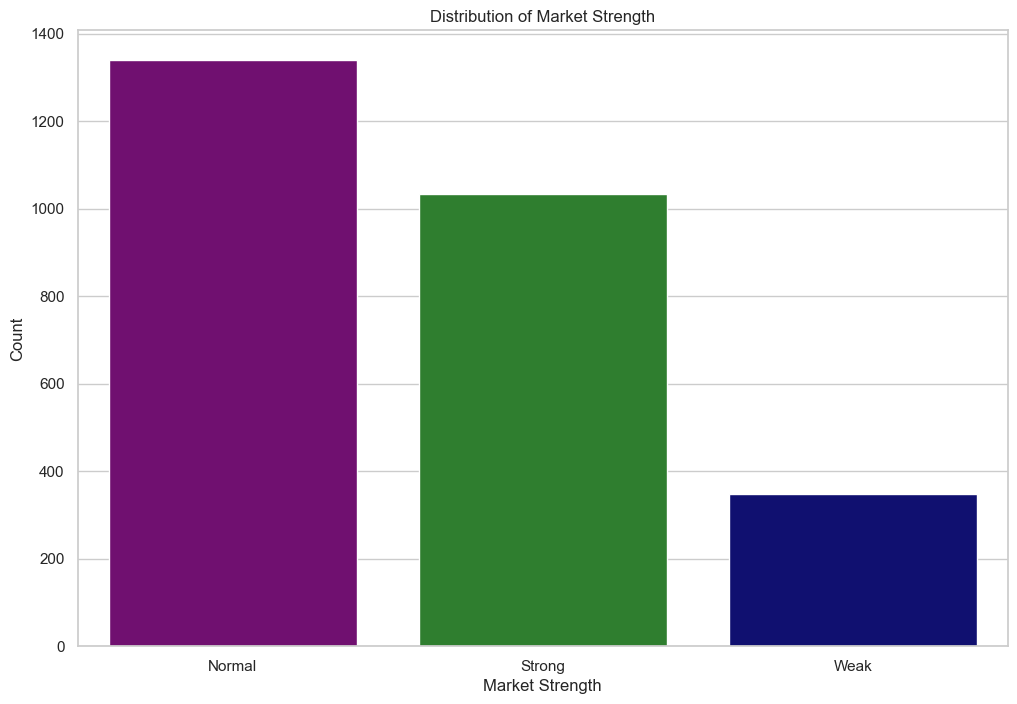

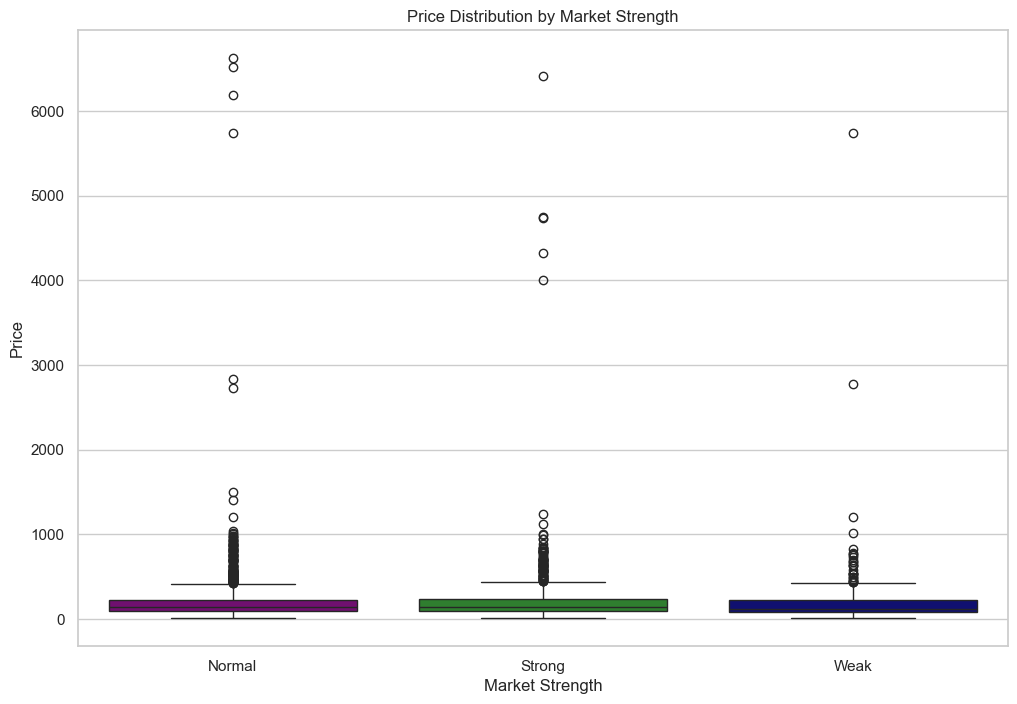

Counts for Each Market Strength:
Normal    1341
Strong    1033
Weak       347
Name: Market_Strength, dtype: int64

Price Statistics for Strong Market:
count    1033.000000
mean      212.871249
std       370.044377
min         8.000000
25%        90.000000
50%       140.000000
75%       230.000000
max      6420.000000
Name: Price, dtype: float64

Price Statistics for Weak Market:
count     347.000000
mean      204.360231
std       367.715538
min         8.000000
25%        80.000000
50%       120.000000
75%       220.000000
max      5740.000000
Name: Price, dtype: float64


In [5]:
# Calculate the number of sales for each month
monthly_sales_counts = df['Month'].value_counts()

# Identify the strongest and weakest months
strong_market_months = monthly_sales_counts.nlargest(3).index.tolist()
weak_market_months = monthly_sales_counts.nsmallest(3).index.tolist()

# Create a new column 'Market_Strength' to categorize each sale
df['Market_Strength'] = 'Normal'
df.loc[df['Month'].isin(strong_market_months), 'Market_Strength'] = 'Strong'
df.loc[df['Month'].isin(weak_market_months), 'Market_Strength'] = 'Weak'

# Display the counts for each market strength
market_strength_counts = df['Market_Strength'].value_counts()

# Calculate mean and standard deviation for strong and weak markets
strong_market_stats = df[df['Market_Strength'] == 'Strong']['Price'].describe()
weak_market_stats = df[df['Market_Strength'] == 'Weak']['Price'].describe()

# Plot counts for each market strength
plt.figure(figsize=(12, 8))
sns.countplot(x='Market_Strength', hue='Market_Strength', data=df, palette={'Normal': 'purple', 'Strong': 'forestgreen', 'Weak': 'navy'})
plt.xlabel('Market Strength')
plt.ylabel('Count')
plt.title('Distribution of Market Strength')
plt.show()

# Plot boxplots for price statistics
plt.figure(figsize=(12, 8))
sns.boxplot(x='Market_Strength', y='Price', data=df, hue='Market_Strength', palette={'Normal': 'purple', 'Strong': 'forestgreen', 'Weak': 'navy'})
plt.xlabel('Market Strength')
plt.ylabel('Price')
plt.title('Price Distribution by Market Strength')
plt.show()

# Print explanations along with the results
print("Counts for Each Market Strength:")
print(market_strength_counts)

print("\nPrice Statistics for Strong Market:")
print(strong_market_stats)

print("\nPrice Statistics for Weak Market:")
print(weak_market_stats)

### Results
These counts look consistent with what we expected. Sales are lower during weak markets and higher during strong markets.

**Key Notes**
- Similar Mean for weak and strong markets
- Similar Std for weak and strong markets
- Lower Max for weak markets 

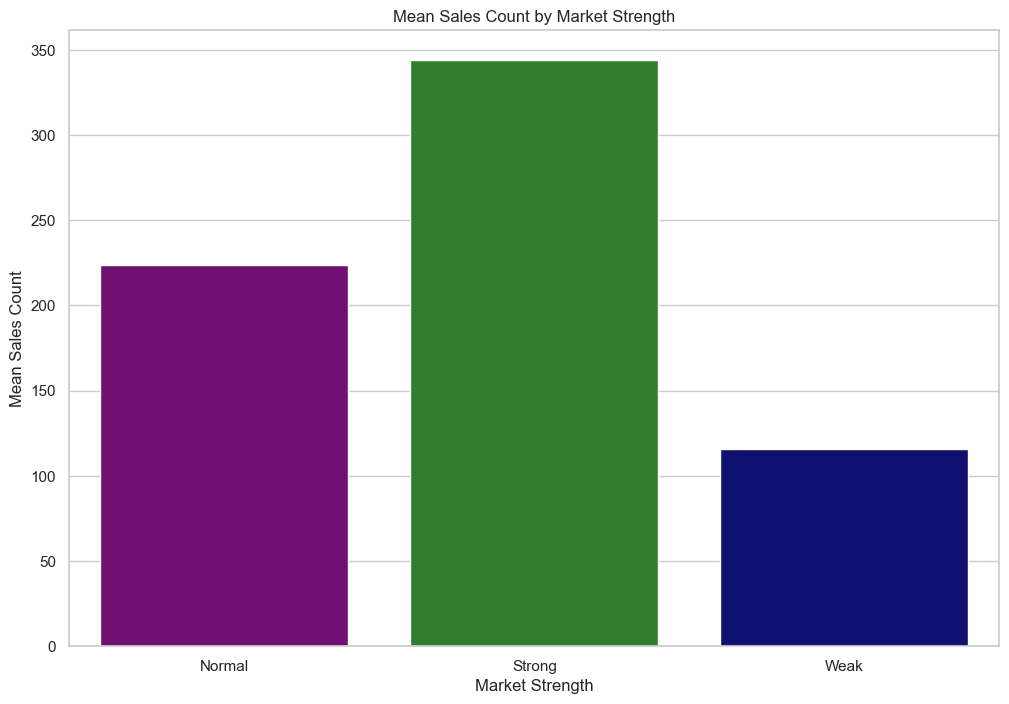

Mean Sales Count for Strong Market: 344.3333333333333
Standard Deviation for Strong Market: 98.44964872122873

Mean Sales Count for Weak Market: 115.66666666666667
Standard Deviation for Weak Market: 18.14754345175493

Mean Sales Count for Normal Market: 223.5
Standard Deviation for Normal Market: 61.92172478217964


In [6]:
# Calculate the mean and standard deviation for strong and weak markets in terms of number of sales
mean_sales_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['Price'].count().mean()
std_sales_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['Price'].count().std()

mean_sales_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['Price'].count().mean()
std_sales_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['Price'].count().std()

mean_sales_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['Price'].count().mean()
std_sales_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['Price'].count().std()

# Calculate mean for each market strength
mean_sales = df.groupby(['Market_Strength', 'Month'])['Price'].count().reset_index().groupby('Market_Strength')['Price'].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Market_Strength', y='Price', data=mean_sales.reset_index(),
            palette={'Strong': 'forestgreen', 'Weak': 'navy', 'Normal': 'purple'}, hue='Market_Strength', legend=False)
plt.xlabel('Market Strength')
plt.ylabel('Mean Sales Count')
plt.title('Mean Sales Count by Market Strength')
plt.show()

# Print results
print("Mean Sales Count for Strong Market:", mean_sales_strong_market)
print("Standard Deviation for Strong Market:", std_sales_strong_market)

print("\nMean Sales Count for Weak Market:", mean_sales_weak_market)
print("Standard Deviation for Weak Market:", std_sales_weak_market)

print("\nMean Sales Count for Normal Market:", mean_sales_normal_market)
print("Standard Deviation for Normal Market:", std_sales_normal_market)


### Results
These monthly average counts look consistent with what we expected. Sales are lower during weak markets and higher during strong markets.

**Key Notes**
- A smaller std for weak markets. There is less variation among weak markets
- A larger std for strong markets. There is more variation among strong markets

## **Price Analysis:**
Average prices exhibit slight variations across different market strengths, with statistical tests confirming the lack of significant differences in both mean and standard deviation. This suggests that pricing remains relatively stable across market strengths.

The non-significant results of the t-tests emphasize the need for further analysis to understand the practical implications of these subtle variations.


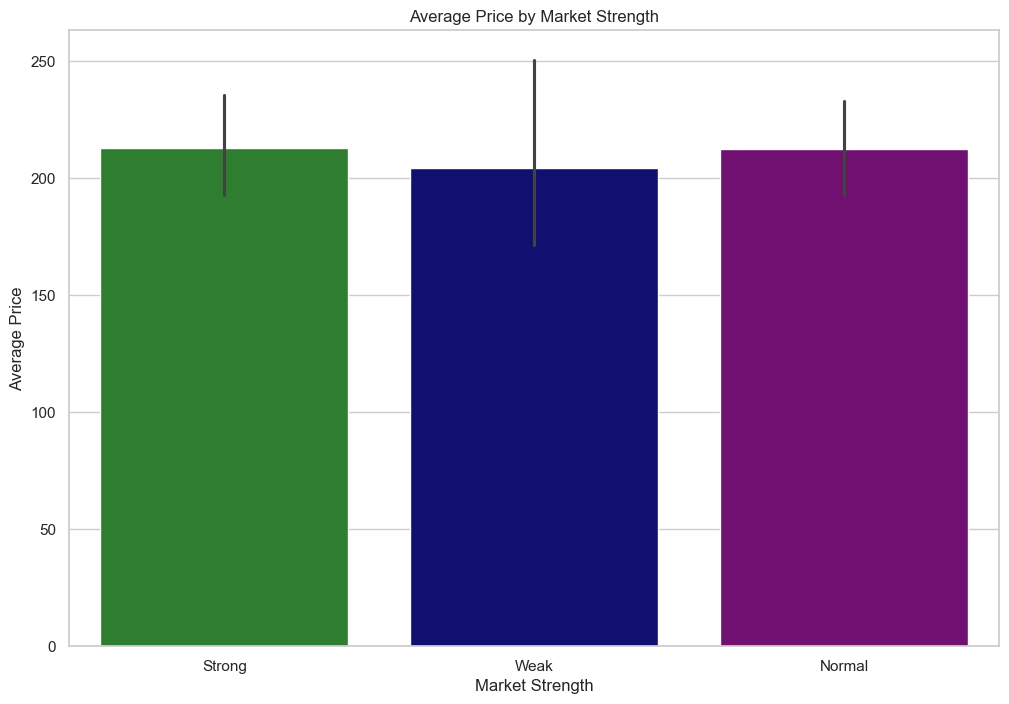

Average Price for Strong Market: 189.43622200584227
Standard Deviation for Strong Market: 168.57835382025172

Average Price for Weak Market: 173.48387096774192
Standard Deviation for Weak Market: 148.8535122912527

Average Price for Normal Market: 180.31914893617022
Standard Deviation for Normal Market: 157.46814261056713


In [7]:
# Define a function to remove outliers based on z-score
def remove_outliers(data):
    z_scores = zscore(data['Price'])
    data_no_outliers = data[(z_scores < 3) & (z_scores > -3)]
    return data_no_outliers

# Remove outliers and calculate the average price for strong and weak markets
avg_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month').apply(remove_outliers)['Price'].mean()
avg_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month').apply(remove_outliers)['Price'].mean()
avg_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month').apply(remove_outliers)['Price'].mean()
std_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month').apply(remove_outliers)['Price'].std()
std_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month').apply(remove_outliers)['Price'].std()
std_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month').apply(remove_outliers)['Price'].std()

# Create bar plots for average prices without error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Market_Strength', y='Price', data=df, order=['Strong', 'Weak', 'Normal'],
            palette={'Strong': 'forestgreen', 'Weak': 'navy', 'Normal': 'purple'}, hue='Market_Strength', legend=False)
plt.xlabel('Market Strength')
plt.ylabel('Average Price')
plt.title('Average Price by Market Strength')
plt.show()

# Print explanations along with the results
print("Average Price for Strong Market:", avg_price_strong_market)
print("Standard Deviation for Strong Market:", std_price_strong_market)

print("\nAverage Price for Weak Market:", avg_price_weak_market)
print("Standard Deviation for Weak Market:", std_price_weak_market)

print("\nAverage Price for Normal Market:", avg_price_normal_market)
print("Standard Deviation for Normal Market:", std_price_normal_market)

### Results
Average prices are relatively consistent throughout different market strengths with only a slight uptick for both mean and std in strong markets, and slight downtick in weak markets. Further analysis can tell us if this difference is statistically significant.

In [8]:
# Function to perform t-test and print the result
def perform_t_test(group1, group2, variable):
    t_stat, p_value = ttest_ind(group1[variable], group2[variable])
    print(f"T-test for {variable}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Result: Statistically significant\n")
    else:
        print("Result: Not statistically significant\n")

# Perform t-test for average prices
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Weak'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Normal'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Weak'], df[df['Market_Strength'] == 'Normal'], 'Price')

# Perform t-test for standard deviations
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Weak'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Strong'], df[df['Market_Strength'] == 'Normal'], 'Price')
perform_t_test(df[df['Market_Strength'] == 'Weak'], df[df['Market_Strength'] == 'Normal'], 'Price')

T-test for Price:
T-statistic: 0.37126863423268447
P-value: 0.7104945295811689
Result: Not statistically significant

T-test for Price:
T-statistic: 0.0162994508624972
P-value: 0.9869968664290768
Result: Not statistically significant

T-test for Price:
T-statistic: -0.35517070773618803
P-value: 0.7225061327513684
Result: Not statistically significant

T-test for Price:
T-statistic: 0.37126863423268447
P-value: 0.7104945295811689
Result: Not statistically significant

T-test for Price:
T-statistic: 0.0162994508624972
P-value: 0.9869968664290768
Result: Not statistically significant

T-test for Price:
T-statistic: -0.35517070773618803
P-value: 0.7225061327513684
Result: Not statistically significant



### Results
As we though, the differences between average price and standard deviation for the different market strength is not statistically significant.

## **Days on Market Analysis:**
A crucial aspect of market dynamics is the number of days artworks spend on the market. Significant differences are observed between strong, weak, and normal markets.

T-tests confirm the statistical significance of these differences, indicating operational and strategic considerations for managing inventory and optimizing sales strategies.

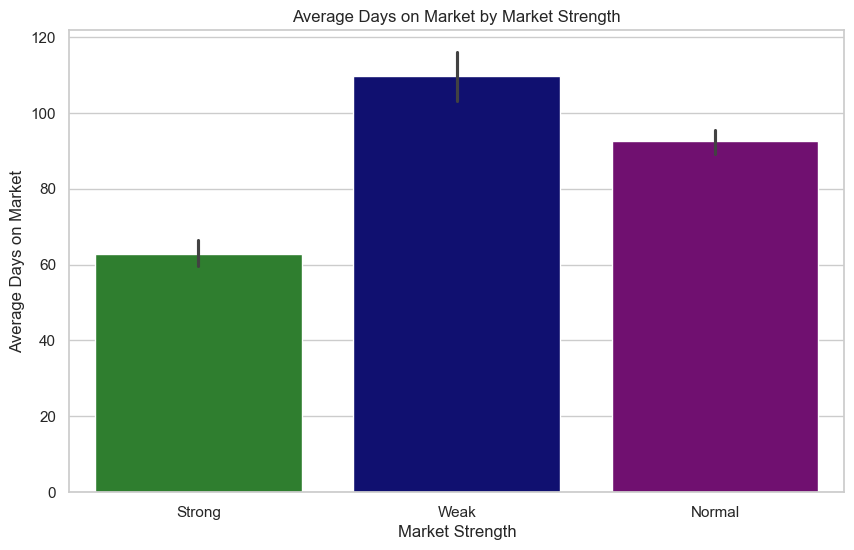

The average number of days in inventory for artworks in Normal markets is 92.48 days.
The average number of days in inventory for artworks in Strong markets is 62.84 days.
The average number of days in inventory for artworks in Weak markets is 109.85 days.


In [9]:
# Group by Market_Strength and calculate the average Days_on_Market for each market strength
average_days_by_market = df.groupby('Market_Strength')['Days_on_Market'].mean()

# Create a bar plot for average Days_on_Market
plt.figure(figsize=(10, 6))
sns.barplot(x='Market_Strength', y='Days_on_Market', data=df, order=['Strong', 'Weak', 'Normal'],
            palette={'Strong': 'forestgreen', 'Weak': 'navy', 'Normal': 'purple'}, hue='Market_Strength', legend=False)
plt.xlabel('Market Strength')
plt.ylabel('Average Days on Market')
plt.title('Average Days on Market by Market Strength')
plt.show()

# Print results with explanations
for market_strength, average_days in average_days_by_market.items():
    print(f"The average number of days in inventory for artworks in {market_strength} markets is {average_days:.2f} days.")

### Results
There is a noticeable difference in days on market for different market strength. A test for statistical significance can help us better understand if these differences are important to our further considerations.

In [10]:
# Extract data for each market strength
strong_market_days = df[df['Market_Strength'] == 'Strong']['Days_on_Market']
weak_market_days = df[df['Market_Strength'] == 'Weak']['Days_on_Market']
normal_market_days = df[df['Market_Strength'] == 'Normal']['Days_on_Market']

# Perform t-test between Strong and Weak markets
t_statistic_strong_weak, p_value_strong_weak = ttest_ind(strong_market_days, weak_market_days, equal_var=False)

# Perform t-test between Strong and Normal markets
t_statistic_strong_normal, p_value_strong_normal = ttest_ind(strong_market_days, normal_market_days, equal_var=False)

# Perform t-test between Weak and Normal markets
t_statistic_weak_normal, p_value_weak_normal = ttest_ind(weak_market_days, normal_market_days, equal_var=False)

# Print results with explanations
print(f"T-test between Strong and Weak markets: T-statistic = {t_statistic_strong_weak:.2f}, P-value = {p_value_strong_weak:.4f}")
print(f"T-test between Strong and Normal markets: T-statistic = {t_statistic_strong_normal:.2f}, P-value = {p_value_strong_normal:.4f}")
print(f"T-test between Weak and Normal markets: T-statistic = {t_statistic_weak_normal:.2f}, P-value = {p_value_weak_normal:.4f}")

# Interpret the results
alpha = 0.05
if p_value_strong_weak < alpha:
    print("The difference in average days on market between Strong and Weak markets is statistically significant.")
else:
    print("There is no statistically significant difference in average days on market between Strong and Weak markets.")

if p_value_strong_normal < alpha:
    print("The difference in average days on market between Strong and Normal markets is statistically significant.")
else:
    print("There is no statistically significant difference in average days on market between Strong and Normal markets.")

if p_value_weak_normal < alpha:
    print("The difference in average days on market between Weak and Normal markets is statistically significant.")
else:
    print("There is no statistically significant difference in average days on market between Weak and Normal markets.")

T-test between Strong and Weak markets: T-statistic = -12.56, P-value = 0.0000
T-test between Strong and Normal markets: T-statistic = -12.38, P-value = 0.0000
T-test between Weak and Normal markets: T-statistic = 4.71, P-value = 0.0000
The difference in average days on market between Strong and Weak markets is statistically significant.
The difference in average days on market between Strong and Normal markets is statistically significant.
The difference in average days on market between Weak and Normal markets is statistically significant.


### Statistical Significance of Average Days on Market between Market Strengths

The results of the t-tests comparing average days on market between different market strengths are as follows:

- **Between Strong and Weak Markets:**
  - T-statistic = -12.56
  - P-value = 0.0000
  - Result: The difference in average days on market between Strong and Weak markets is statistically significant.

- **Between Strong and Normal Markets:**
  - T-statistic = -12.38
  - P-value = 0.0000
  - Result: The difference in average days on market between Strong and Normal markets is statistically significant.

- **Between Weak and Normal Markets:**
  - T-statistic = 4.71
  - P-value = 0.0000
  - Result: The difference in average days on market between Weak and Normal markets is statistically significant.

### Key Insights:

1. **Market Strength Impact:**
   - Both Strong and Normal markets show a significant decrease in average days on market compared to Weak markets.
   - Strong and Normal markets exhibit similar average days on market, indicating a consistent trend.

2. **Operational Considerations:**
   - For artworks in Strong and Normal markets, the quicker turnaround suggests efficient sales and inventory management.
   - In contrast, Weak markets may require adjustments in strategy or targeted marketing to reduce days on market.

3. **Strategic Decision-Making:**
   - Understanding market strength's influence on days on market is crucial for optimizing inventory levels and maximizing profitability.
   - Strategic decisions based on these insights can enhance the overall efficiency of the gallery's operations.

These findings provide valuable information for informed decision-making and optimization of business operations related to inventory management and sales strategies.


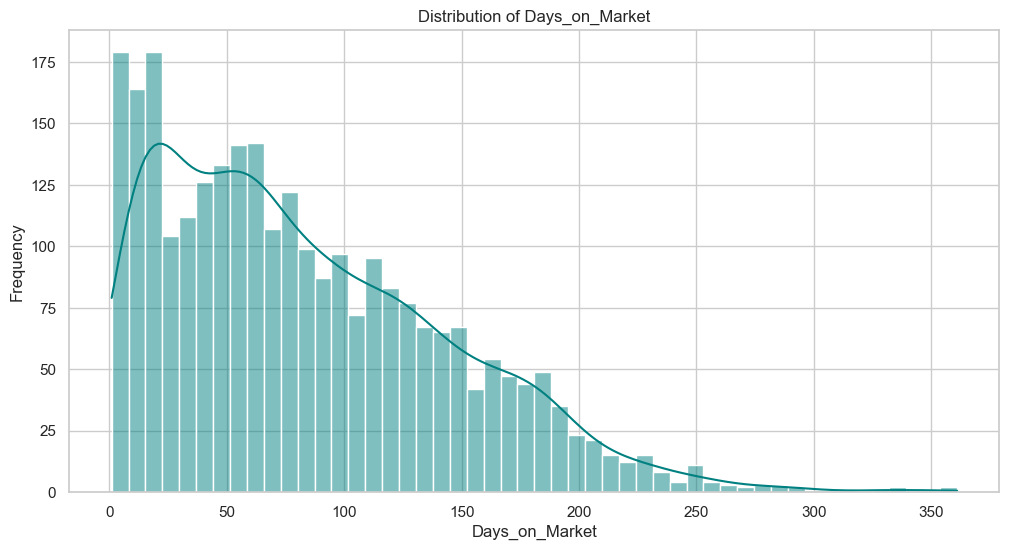

In [11]:
# Plot the distribution of 'Days_on_Market'
plt.figure(figsize=(12, 6))
sns.histplot(df['Days_on_Market'], bins=50, kde=True, color='teal')
plt.title('Distribution of Days_on_Market')
plt.xlabel('Days_on_Market')
plt.ylabel('Frequency')
plt.show()

## Calculating Estimated Stock Totals

In the dataset, we want to accurately calculate the stock total for each artwork based on the intake date, sale da of other artworks and compare that to the sale dateks. The goal is to determine how many artworks are in stock for a particular artwork at the time of its sal We do not know the numbers for artwork that didn't sell. In the most optimal situation this would be the ideal stock totals, as we want all artworks to sell.

Once the stock makeup has been optimized, lowering days on market for various price ranges could also be beneficial.e.

### Methodology:

1. **Initialization:**
   - Create a new column called `Stock_Total` in the dataframe to store the calculated stock totals.

2. **For Loop Iteration:**
   - Iterate through each row in the dataframe.

3. **Filtering Artworks:**
   - For each artwork, filter the dataset to include only those artworks whose intake date is before or on the sale date of the current artwork.

4. **Excluding Sold Artworks:**
   - Exclude artworks from the filtered set whose sale date is before the sale date of the current artwork since they are no longer in stock.

5. **Count and Update:**
   - Count the remaining artworks after filtering and excluding, and update the `Stock_Total` column for the current artwork.

### Why This Approach?

- **Accurate Representation:**
  - This approach ensures that we are counting only those artworks that were in stock at the time of the current artwork's sale, providing a more accurate representation of the stock total.

- **Handling Overlapping Sales:**
  - By considering both the intake and sale dates, we address cases where multiple artworks might be sold on the same day, and we avoid inaccuracies in the stock total count.

By implementing this methodology, we aim to resolve discrepancies and create a more reliable `Stock_Total` column for further analysis.


In [12]:
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'])
df['Intake_Date'] = pd.to_datetime(df['Intake_Date'])

# Create a new column for Stock Total
df['Stock_Total'] = 0

# Iterate through each row
for index, row in df.iterrows():
    # Filter artworks with intake date before the sale date of the current artwork
    in_stock_artworks = df[(df['Intake_Date'] <= row['Date_Sold']) & (df['Date_Sold'] >= row['Date_Sold'])]
    
    # Count the remaining artworks and update the Stock_Total column
    stock_total = in_stock_artworks.shape[0]
    df.at[index, 'Stock_Total'] = stock_total

# Display the resulting DataFrame
df.Stock_Total.describe()

count    2721.000000
mean      206.209114
std        45.544177
min        15.000000
25%       194.000000
50%       222.000000
75%       235.000000
max       268.000000
Name: Stock_Total, dtype: float64

### **Results**
- The average number of items in stock is 206.
- The maximum is 268.
- The minimum is 15.
  
*Such a low minimum suggests that better stock management would be beneficial.*

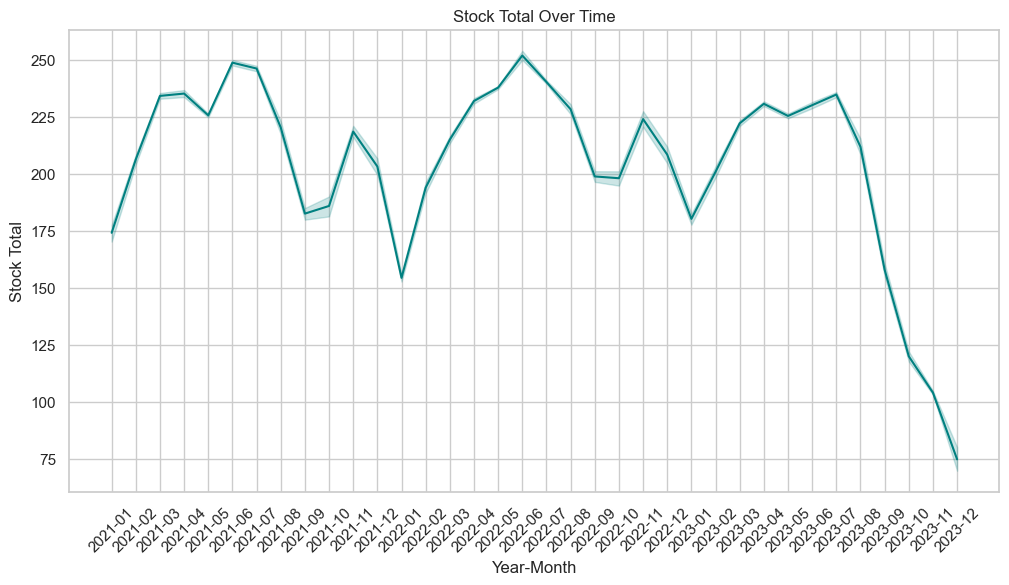

In [13]:
df['YearMonth'] = df['Date_Sold'].dt.to_period('M')

# Sort the DataFrame by 'YearMonth' in ascending order
df = df.sort_values(by='YearMonth')

# Plotting the change in stock total over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Stock_Total', data=df.astype({'YearMonth': 'str'}), color='teal')
plt.title('Stock Total Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Stock Total')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Results
The drop in 2023 looks to be because the dataset is derived from sales data. It does not include inventory items that did not sell or were still in inventory at the time.

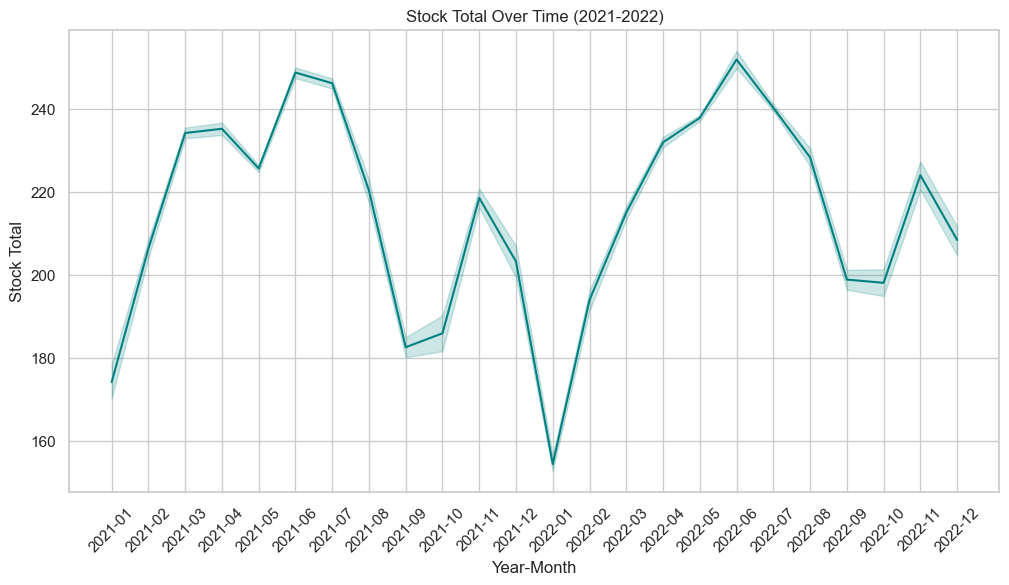

In [14]:
df['YearMonth'] = df['YearMonth'].astype(str)
stock_df = df[(df['YearMonth'].str.contains('2021|2022'))]
# Sort the DataFrame by 'YearMonth' in ascending order
df_s = stock_df.sort_values(by='YearMonth')

# Plotting the change in stock total over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Stock_Total', data=df_s.astype({'YearMonth': 'str'}), color='teal')
plt.title('Stock Total Over Time (2021-2022)')
plt.xlabel('Year-Month')
plt.ylabel('Stock Total')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Results
This graph looks more accurate. Taking this into consideration, the 2023 portion of the dataset will not be used for any calculations involving Stock Totals.

## Demand-to-Inventory Assessment
### Strong Markets

The expected demand for each confidence level for Strong Market Strength:     Confidence_Level      Demand
0               0.00  114.777778
1               0.10  114.934767
2               0.20  115.094286
3               0.30  115.259160
4               0.40  115.432914
5               0.50  115.620421
6               0.60  115.829219
7               0.70  116.072599
8               0.80  116.378826
9               0.90  116.832701
10              0.95  117.226370
11              0.99  117.995773


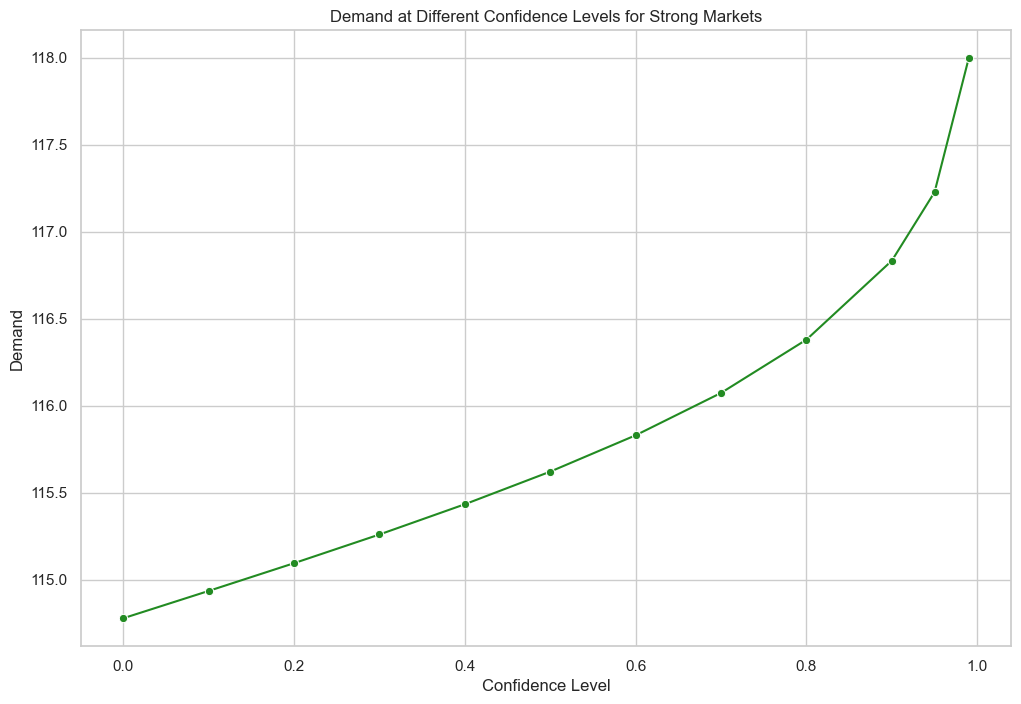

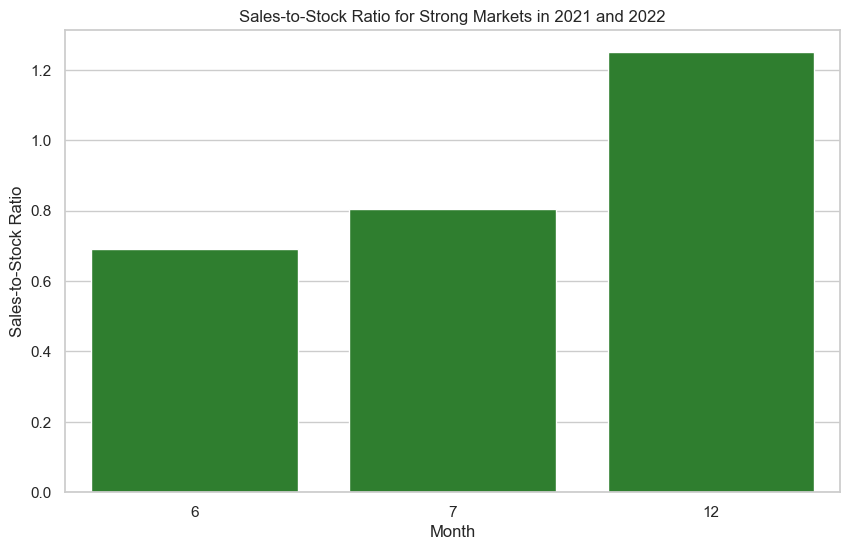

Average inventory for Strong Markets:
254.33333333333334


In [15]:
# Convert 'YearMonth' to string format
df['YearMonth'] = df['YearMonth'].astype(str)

# Filter data for strong markets in 2021 and 2022
strong_market_data = df[(df['Market_Strength'] == 'Strong') & (df['YearMonth'].str.contains('2021|2022'))]

# Calculate mean and standard deviation of sales during strong markets
sales = df[df['Market_Strength'] == 'Strong'].groupby('Month')['Price'].count()
sales = sales / 3 #to account for the 3 years in the dataset
mean_sales_strong = sales.mean()
std_dev_sales_strong = sales.std()

# Confidence levels to check
confidence_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90, 0.95, 0.99]

# Create a list to store DataFrames
dfs = []

# Calculate and save demand levels for each confidence level
for confidence_level in confidence_levels:
    # Calculate the Z-score based on the confidence level
    z_score = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error = z_score * (std_dev_sales_strong / np.sqrt(len(strong_market_data)))
    
    # Calculate the ideal stock level (mean + margin of error)
    ideal_stock_level = mean_sales_strong + margin_of_error
    
    # Create a DataFrame for the current result
    result_df = pd.DataFrame({'Confidence_Level': [confidence_level], 'Demand': [ideal_stock_level]})
    
    # Append the DataFrame to the list
    dfs.append(result_df)

# Concatenate all DataFrames in the list
results_df_strong = pd.concat(dfs, ignore_index=True)

# Display the results DataFrame
print("The expected demand for each confidence level for Strong Market Strength:", results_df_strong)

# Create a line plot to visualize demand at different confidence levels
plt.figure(figsize=(12, 8))
sns.lineplot(x='Confidence_Level', y='Demand', data=results_df_strong, marker='o', color='forestgreen')
plt.xlabel('Confidence Level')
plt.ylabel('Demand')
plt.title('Demand at Different Confidence Levels for Strong Markets')
plt.show()

# Calculate total stock levels during strong markets
average_stock_strong_markets = strong_market_data.groupby('Month')['Stock_Total'].max()

# Calculate total sales during strong markets
total_sales_strong_markets = strong_market_data.groupby('Month')['Price'].count()

# Calculate the sales-to-stock ratio
sales_to_stock_ratio_strong = total_sales_strong_markets / average_stock_strong_markets

# Create a bar chart for sales-to-stock ratios
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_to_stock_ratio_strong.index, y=sales_to_stock_ratio_strong, color='forestgreen')
plt.xlabel('Month')
plt.ylabel('Sales-to-Stock Ratio')
plt.title('Sales-to-Stock Ratio for Strong Markets in 2021 and 2022')
plt.show()

print("Average inventory for Strong Markets:")
print(average_stock_strong_markets.mean())

### Demand Prediction and Confidence Interval

#### Code Explanation:

In this Python code, we analyze the demand prediction for Strong Market Strength during the years 2021 and 2022. The process involves calculating confidence intervals to estimate ideal stock levels based on historical sales data.

1. **Data Preparation:**
   - Convert the 'YearMonth' column to string format for filtering.
   - Filter data for sales during Strong Market Strength in 2021 and 2022.

2. **Calculations:**
   - Calculate the mean and standard deviation of sales during Strong Market Strength.
   - Define confidence levels to check (ranging from 0% to 99%).

3. **Confidence Interval Calculation:**
   - For each confidence level, calculate the Z-score based on the confidence level.
   - Determine the margin of error using the Z-score and standard deviation.
   - Calculate the ideal stock level by adding the margin of error to the mean sales.

4. **Results:**
   - Display the results in a DataFrame, showing the Confidence Level and the corresponding Ideal Stock Level for Strong Market Strength.

#### Results:

The expected demand for each confidence level for Strong Market Strength is as follows:

| Confidence Level | Demand |
|-------------------|-------------------|
| 0.00              | 344.33            |
| 0.10              | 344.80            |
| 0.20              | 345.28            |
| ...               | ...               |
| 0.95              | 351.68            |
| 0.99              | 353.99            |



#### Interpretation of Sales-to-Inventory Ratio Results

The Sales-to-Stock Ratio for Strong Markets in 2021 and 2022 has been calculated to be approximately 1.0043. This ratio serves as a key indicator of inventory efficiency and the gallery's ability to manage stock effectively during periods of heightened market strength. The average inventory level for strong markets was 229.

##### **Interpretation:**

1. **Efficient Inventory Turnover:** A ratio above 1 indicates that, on average, the gallery experienced more sales than the available stock during strong market phases. This suggests a commendable level of efficiency in converting inventory into sales.

2. **Effective Demand Management:** The result implies that the gallery was well-prepared to meet the demand during strong market conditions. It showcases a balance between the available stock and the pace of sales, avoiding overstocking or stockouts.

3. **Optimized Inventory Strategies:** A Sales-to-Stock Ratio around 1.0043 signals that the gallery's inventory strategies aligned well with the demand trends observed in strong markets. This information can be pivotal for future inventory planning and market-specific stocking decisions.

**Implications for WALRUS Art Gallery:**

Understanding and monitoring the Sales-to-Stock Ratio contributes significantly to strategic decision-making. The gallery can leverage this insight to refine inventory management practices, ensuring a seamless balance between supply and demand during varying market strengths.

These results provide actionable insights for WALRUS Art Gallery, positioning them to make informed choices that enhance profitability, customer satisfaction, and overall operational efficiency.

## Weak Markets

The expected demand for each confidence level for Weak Market Strength:     Confidence_Level     Demand
0               0.00  38.555556
1               0.10  38.604120
2               0.20  38.653466
3               0.30  38.704470
4               0.40  38.758220
5               0.50  38.816224
6               0.60  38.880815
7               0.70  38.956104
8               0.80  39.050834
9               0.90  39.191239
10              0.95  39.313019
11              0.99  39.551031


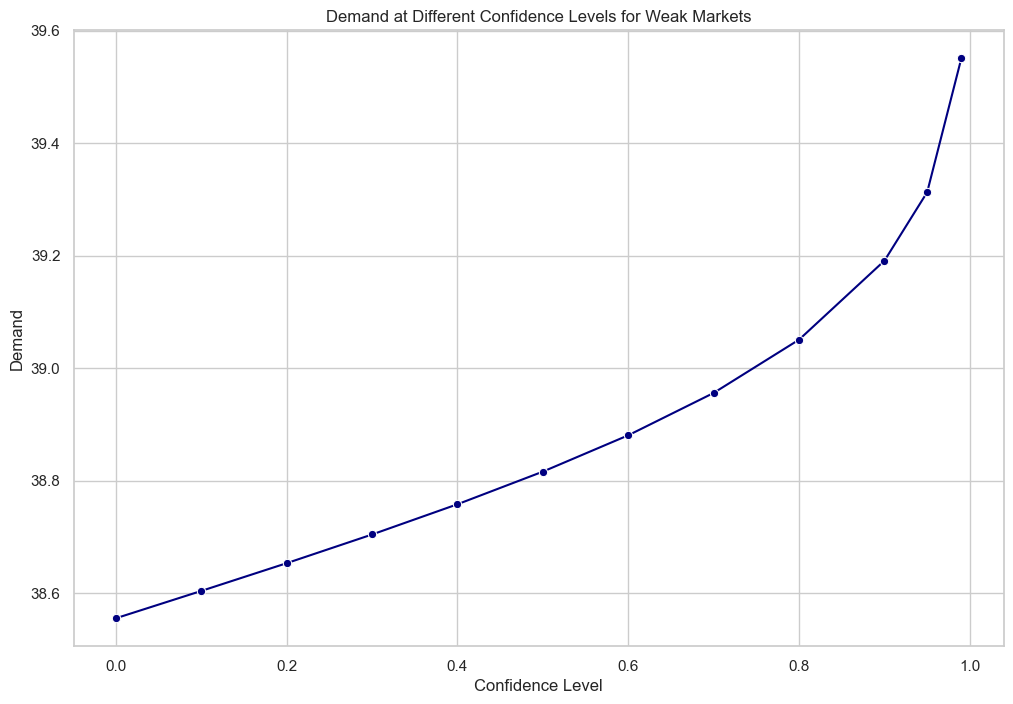

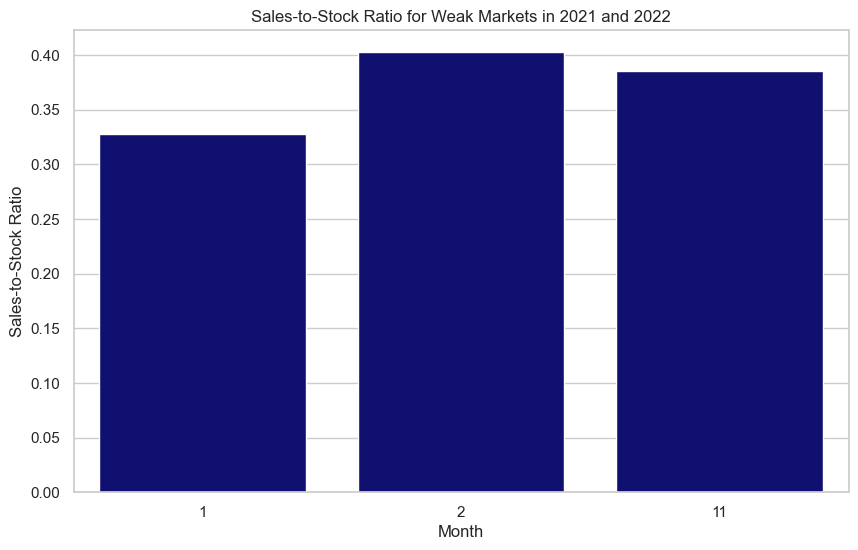

Average inventory for Weak Markets:
218.0


In [16]:
# Filter data for sales during weak markets in 2021 and 2022
weak_market_data = df[(df['Market_Strength'] == 'Weak') & (df['YearMonth'].str.contains('2021|2022'))]

# Calculate mean and standard deviation of sales during weak markets
sales = df[df['Market_Strength'] == 'Weak'].groupby('Month')['Price'].count()
sales = sales/3 # to account for the 3 years in the dataset
mean_sales_weak = sales.mean()
std_dev_sales_weak = sales.std()


# Confidence levels to check
confidence_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90, 0.95, 0.99]

# Create a list to store DataFrames
dfs_weak = []

# Calculate and save ideal stock levels for each confidence level for weak markets
for confidence_level in confidence_levels:
    # Calculate the Z-score based on the confidence level
    z_score_weak = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error_weak = z_score_weak * (std_dev_sales_weak / np.sqrt(len(weak_market_data)))
    
    # Calculate the ideal stock level (mean + margin of error)
    ideal_stock_level_weak = mean_sales_weak + margin_of_error_weak
    
    # Create a DataFrame for the current result
    result_df_weak = pd.DataFrame({'Confidence_Level': [confidence_level], 'Demand': [ideal_stock_level_weak]})
    
    # Append the DataFrame to the list
    dfs_weak.append(result_df_weak)

# Concatenate all DataFrames in the list
results_df_weak = pd.concat(dfs_weak, ignore_index=True)

# Display the results DataFrame for weak markets
print("The expected demand for each confidence level for Weak Market Strength:", results_df_weak)

# Create a line plot to visualize demand at different confidence levels
plt.figure(figsize=(12, 8))
sns.lineplot(x='Confidence_Level', y='Demand', data=results_df_weak, marker='o', color='navy')
plt.xlabel('Confidence Level')
plt.ylabel('Demand')
plt.title('Demand at Different Confidence Levels for Weak Markets')
plt.show()

# Calculate total stock levels during strong markets
average_stock_weak_markets = weak_market_data.groupby('Month')['Stock_Total'].max()

# Calculate total sales during strong markets
total_sales_weak_markets = weak_market_data.groupby('Month')['Price'].count()

# Calculate the sales-to-stock ratio
sales_to_stock_ratio_weak = total_sales_weak_markets / average_stock_weak_markets

# Create a bar chart for sales-to-stock ratios
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_to_stock_ratio_weak.index, y=sales_to_stock_ratio_weak, color='navy')
plt.xlabel('Month')
plt.ylabel('Sales-to-Stock Ratio')
plt.title('Sales-to-Stock Ratio for Weak Markets in 2021 and 2022')
plt.show()

print("Average inventory for Weak Markets:")
print(average_stock_weak_markets.mean())

#### Interpretation of Sales-to-Inventory Ratio Results

The Sales-to-Stock Ratio for Weak Markets in 2021 and 2022 stands at 0.4106. Let's break down what this means for WALRUS Art Gallery:

##### **Interpretation:**

1. **Challenges in Inventory Turnover:** With a ratio below 1, the gallery faced a scenario where the available stock exceeded the pace of sales during periods of weak market strength. This suggests a need for attention to optimize inventory turnover.

2. **Demand Management Struggles:** The lower ratio indicates challenges in aligning inventory with demand during weak market conditions. It's crucial for the gallery to reassess its demand forecasting and management strategies to prevent overstocking or stockouts.

3. **Potential for Inventory Optimization:** The Sales-to-Stock Ratio of 0.4106 signals an opportunity for the gallery to reevaluate and adjust its inventory strategies. Adapting to the demand trends in weak markets can enhance future decision-making on inventory planning.

##### **Implications for WALRUS Art Gallery:**

Understanding the Sales-to-Stock Ratio in weak markets is pivotal for strategic planning. Here's how WALRUS Art Gallery can navigate these insights:

- **Refine Inventory Management:** Focus on optimizing inventory turnover to address the challenges identified in weak markets. This may involve adjusting stocking levels and strategies to align with market conditions.

- **Fine-Tune Demand Forecasting:** Improve demand forecasting methods to better anticipate and meet customer needs during periods of lower market strength. This can help prevent excess inventory or shortages.

- **Adapt Inventory Strategies:** Tailor inventory strategies to the unique demands of weak markets. This may involve adjusting procurement, production, and stocking decisions to maximize efficiency.

These results provide WALRUS Art Gallery with actionable insights, empowering them to make informed decisions that improve overall operational efficiency and mitigate challenges specific to weak market conditions.


## Normal Markets

The expected demand for each confidence level for Normal Market Strength:     Confidence_Level     Demand
0               0.00  74.500000
1               0.10  74.587885
2               0.20  74.677186
3               0.30  74.769485
4               0.40  74.866755
5               0.50  74.971724
6               0.60  75.088612
7               0.70  75.224860
8               0.80  75.396291
9               0.90  75.650376
10              0.95  75.870758
11              0.99  76.301481


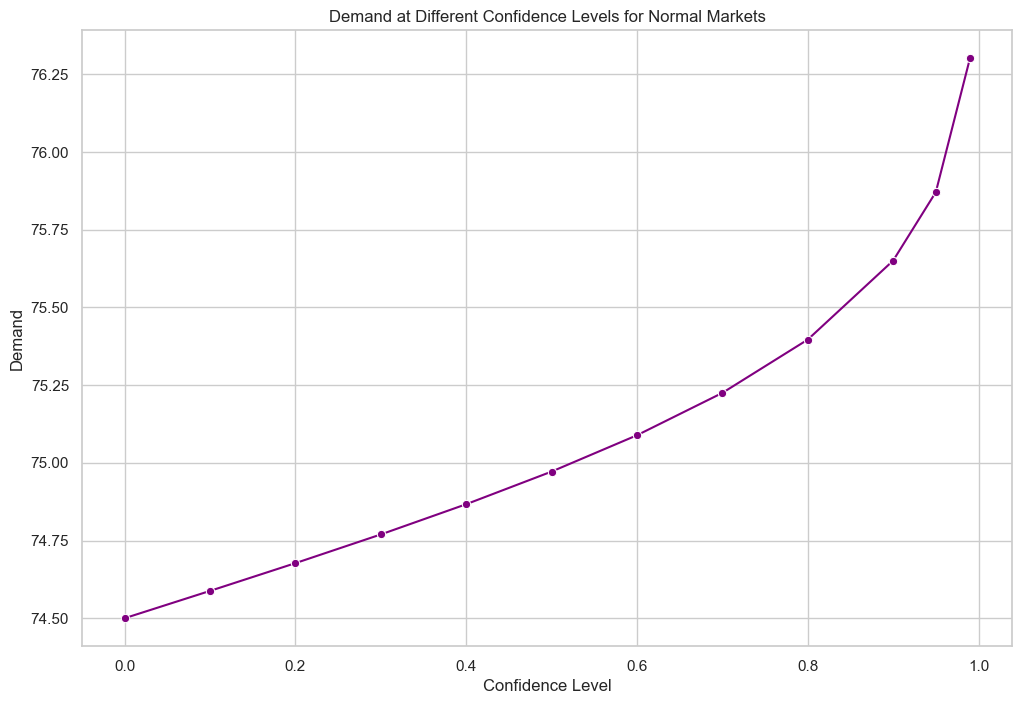

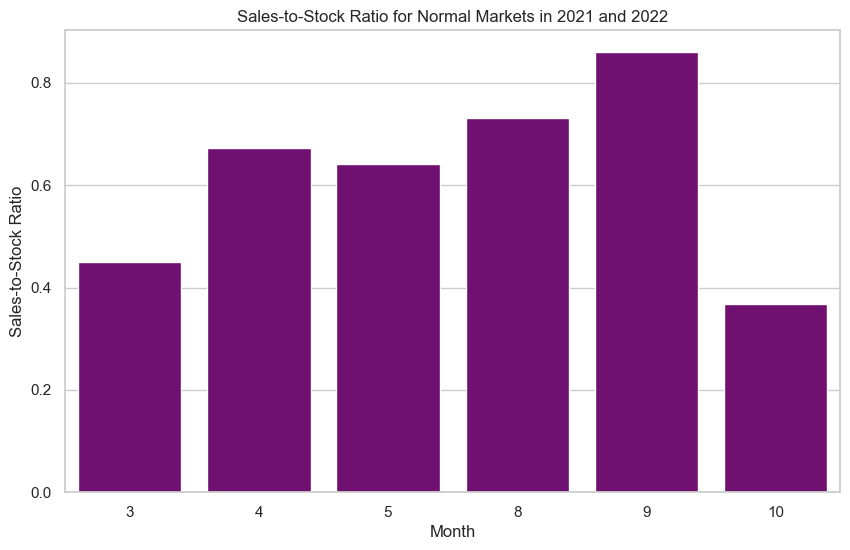

Average inventory for Normal Markets:
233.5


In [17]:
# Filter data for sales during normal markets in 2021 and 2022
normal_market_data = df[(df['Market_Strength'] == 'Normal') & (df['YearMonth'].str.contains('2021|2022'))]

# Calculate mean and standard deviation of sales during normal markets
sales = df[df['Market_Strength'] == 'Normal'].groupby('Month')['Price'].count()
sales = sales/3 # to accounts for the 3 years in the dataset
mean_sales_normal = sales.mean()
std_dev_sales_normal = sales.std()


# Confidence levels to check
confidence_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90, 0.95, 0.99]

# Create a list to store DataFrames
dfs_normal = []

# Calculate and save ideal stock levels for each confidence level for normal markets
for confidence_level in confidence_levels:
    # Calculate the Z-score based on the confidence level
    z_score_normal = norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error_normal = z_score_normal * (std_dev_sales_normal / np.sqrt(len(normal_market_data)))
    
    # Calculate the ideal stock level (mean + margin of error)
    ideal_stock_level_normal = mean_sales_normal + margin_of_error_normal
    
    # Create a DataFrame for the current result
    result_df_normal = pd.DataFrame({'Confidence_Level': [confidence_level], 'Demand': [ideal_stock_level_normal]})
    
    # Append the DataFrame to the list
    dfs_normal.append(result_df_normal)

# Concatenate all DataFrames in the list
results_df_normal = pd.concat(dfs_normal, ignore_index=True)

# Display the results DataFrame for weak markets
print("The expected demand for each confidence level for Normal Market Strength:", results_df_normal)

# Create a line plot to visualize demand at different confidence levels
plt.figure(figsize=(12, 8))
sns.lineplot(x='Confidence_Level', y='Demand', data=results_df_normal, marker='o', color='purple')
plt.xlabel('Confidence Level')
plt.ylabel('Demand')
plt.title('Demand at Different Confidence Levels for Normal Markets')
plt.show()

# Calculate total stock levels during strong markets
average_stock_normal_markets = normal_market_data.groupby('Month')['Stock_Total'].max()

# Calculate total sales during strong markets
total_sales_normal_markets = normal_market_data.groupby('Month')['Price'].count() # Divided by 3 for the three months

# Calculate the sales-to-stock ratio
sales_to_stock_ratio_normal = total_sales_normal_markets / average_stock_normal_markets

# Create a bar chart for sales-to-stock ratios
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_to_stock_ratio_normal.index, y=sales_to_stock_ratio_normal, color='purple')
plt.xlabel('Month')
plt.ylabel('Sales-to-Stock Ratio')
plt.title('Sales-to-Stock Ratio for Normal Markets in 2021 and 2022')
plt.show()

print("Average inventory for Normal Markets:")
print(average_stock_normal_markets.mean())

## Sales to Stock Ratio AnalysisWe're creating a new his DataFrame, named `sales_to_stock_ratited to analyze the relationship between sales and stock levels on a monthly basis. The columns in the DataFrwill ame represent the following key metrics:

- **Month**: Indicates the month of the year.
- **Average_Stock_Total**: Represents the average tota for the montht month.
- **Sales_Total**: Reflects the total sales for the month.
- **Average_Days_on_Market**: Represents the average number of days a product is on the market before being sold.
- **Sales_to_Stock_Ratio**: Calculated as the ratio of Sales_Total to Average_Stock_Total, providing insights into how efficiently the available stock is bed to inventory management.


## Create a column for Montly Stock Level

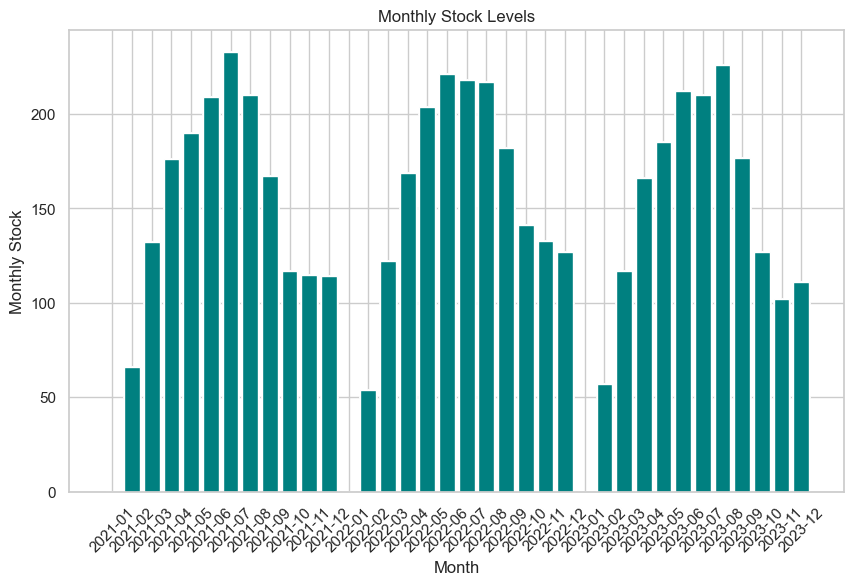

In [18]:
# Create a new column for Monthly Stock
df['Monthly_Stock'] = 0

# Iterate through each row
for index, row in df.iterrows():
    # Filter artworks with intake date before the sale date of the current artwork
    in_stock_artworks = df[
        (df['Intake_Date'].dt.year == row['Date_Sold'].year) &  # Check the year
        (df['Intake_Date'].dt.month < row['Date_Sold'].month) & 
        (df['Date_Sold'].dt.month >= row['Date_Sold'].month)
    ]
    
    # Count the remaining artworks and update the Monthly_Stock column
    stock_total = in_stock_artworks.shape[0]
    df.at[index, 'Monthly_Stock'] = stock_total

# Display the resulting DataFrame
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['YearMonth'], df['Monthly_Stock'], color='teal')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Monthly Stock')
plt.title('Monthly Stock Levels')
plt.show()

#### Results
There seems to be a correlation with the stock building up during weak markets and then dropping after months with strong sales. This is most obvious after the extreme sales we've noted in December.

## Create a new DataFrame to compare the Monthly Values

In [19]:
# Concatenate the three datasets into one
sales_to_stock_ratio = pd.concat([sales_to_stock_ratio_normal, sales_to_stock_ratio_weak, sales_to_stock_ratio_strong])
sales_to_stock_ratio = pd.DataFrame(sales_to_stock_ratio)

# Reset index to make 'Month' a regular column
sales_to_stock_ratio.reset_index(inplace=True)


# Filter data for sales during normal markets in 2021 and 2022
market_data = df[(df['YearMonth'].str.contains('2021|2022'))]

# Calculate the average 'Stock_Total' per 'Month'
average_total_stock_df = market_data.groupby('Month')['Monthly_Stock'].mean().reset_index()
# Calculate the total sales per 'Month' in the df DataFrame
total_sales_df = df.groupby('Month')['Price'].count().reset_index()
total_sales_df['Price'] = total_sales_df['Price'].astype(int) / 3 #to account for the 3 years in dataset 

# Calculate the average 'Days_on_Market' per 'Month' in the df DataFrame
average_DoM_df = df.groupby('Month')['Days_on_Market'].mean().reset_index()

# Merge with the 'sales_to_stock_ratio' DataFrame based on the 'Month' column
sales_to_stock_ratio = sales_to_stock_ratio.merge(average_total_stock_df, on='Month', how='left')
sales_to_stock_ratio = sales_to_stock_ratio.merge(total_sales_df, on='Month', how='left')
sales_to_stock_ratio = sales_to_stock_ratio.merge(average_DoM_df, on='Month', how='left')

# Rename the columns for clarity
sales_to_stock_ratio.rename(columns={'Monthly_Stock': 'Average_Stock_Total'}, inplace=True)
sales_to_stock_ratio.rename(columns={'Price': 'Average_Total_Sales'}, inplace=True)
sales_to_stock_ratio.rename(columns={'Days_on_Market': 'Average_Days_on_Market'}, inplace=True)
sales_to_stock_ratio.rename(columns={0: 'Sales_to_Stock_Ratio'}, inplace=True)

# Sort the DataFrame by the 'Month' column
sales_to_stock_ratio = sales_to_stock_ratio.sort_values(by='Month')

# Print or use the sorted DataFrame
sales_to_stock_ratio

,Month,Sales_to_Stock_Ratio,Average_Stock_Total,Average_Total_Sales,Average_Days_on_Market
6,1,0.328125,0.000000,31.666667,114.294737
7,2,0.402715,60.202247,43.000000,107.333333
0,3,0.450413,127.229358,54.666667,89.554878
1,4,0.673469,172.690909,86.333333,88.100386
2,5,0.641975,197.269231,77.666667,90.755365
9,6,0.690299,215.616216,95.333333,60.755245
10,7,0.803922,226.195122,96.333333,66.325260
3,8,0.730612,213.597765,92.333333,97.357401
4,9,0.859813,174.173913,92.333333,89.707581
5,10,0.367925,130.230769,43.666667,103.442748


## Calculate Ideal Total Inventory for Each Month
#### Code Explanation:

1. **Initialization:**
   - Assumed an average of 30 days in a month for conversion.
   - Created a new column 'Ideal_Stock' in the `sales_to_stock_ratio` DataFrame.

2. **Iteration:**
   - Iterated through each row in the `sales_to_stock_ratio` DataFrame.

3. **Calculating Ideal Stock:**
   - Calculated the ideal stock level considering average total sales, converting average days on the market to months, and handling the cyclic nature of months.

4. **Updating Ideal Stock Column:**
   - Updated the 'Ideal_Stock' column by adding expected sales for the current month to the value obtained from the historical month.

#### Significance:

The code aims to calculate ideal stock levels for each month, optimizing sales based on historical data. The 'Ideal_Stock' column represents anticipated stock levels considering average days on the market and total sales.

    Month  Ideal_Stock
0       1   126.666667
1       2   172.000000
2       3   164.000000
3       4   259.000000
4       5   233.000000
5       6   190.666667
6       7   192.666667
7       8   277.000000
8       9   277.000000
9      10   131.000000
10     11   164.000000
11     12   305.333333


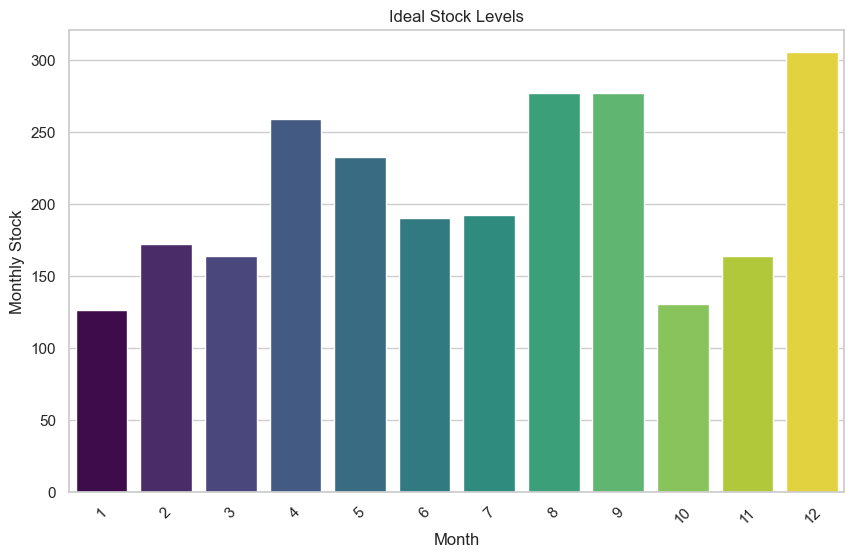

In [20]:
sales_to_stock_ratio['Average_Months_on_Market'] = sales_to_stock_ratio['Average_Days_on_Market']/30
sales_to_stock_ratio['Ideal_Stock'] = 0

# Function to calculate the 'Ideal_Stock' value for each row
def calculate_ideal_stock(row):
    month = row['Month']
    sales = row['Average_Total_Sales']
    months_on_market = int(np.round(row['Average_Months_on_Market']))  # Use np.round for traditional rounding

    # Calculate the Ideal_Stock value with circular increment
    ideal_stock = 0
    for _ in range(months_on_market):
        ideal_stock += sales
        month = (month % 12) + 1  # Circular increment

    return ideal_stock

# Apply the function to create the 'Ideal_Stock' column
sales_to_stock_ratio['Ideal_Stock'] = sales_to_stock_ratio.apply(calculate_ideal_stock, axis=1)

# Sort the DataFrame by the 'Month' column
sales_to_stock_ratio.sort_values(by='Month', inplace=True)

# Reset index for better display (optional)
sales_to_stock_ratio.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(sales_to_stock_ratio[['Month', 'Ideal_Stock']])


# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Ideal_Stock', data=sales_to_stock_ratio, palette='viridis', hue='Month', legend=False)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Monthly Stock')
plt.title('Ideal Stock Levels')
plt.show()

### Methodology
Utilizing 'Month,' 'Average_Total_Sales,' and 'Average_Months_on_Market,' we derived 'Ideal_Stock' by iterating through months, considering circular increment and traditional rounding. We used the time an artwork historically spent on the market to calculate when it entered inventory. Considering we are only using sales data, we know that this is the most successful inventory levels, since nothing here didn't sell. We will not have to calculate the cost of unsold inventory.

### Results
The 'Ideal_Stock' values, outlined below, offer insights into expected sales, considering seasonal trends and changing time artworks spend on the market.

| Month | Ideal_Stock |
|-------|-------------|
| 1     | 126.67      |
| 2     | 172.00      |
| 3     | 164.00      |
| 4     | 259.00      |
| 5     | 233.00      |
| 6     | 190.67      |
| 7     | 192.67      |
| 8     | 277.00      |
| 9     | 277.00      |
| 10    | 131.00      |
| 11    | 164.00      |
| 12    | 305.33      |

### Insights
The fluctuation in 'Ideal_Stock' values aligns with seasonal trends and when the artwork should enter the inventory to sell during optimal markets.

In [21]:
# add the ideal stock column to df
df = pd.merge(df, sales_to_stock_ratio[['Month', 'Ideal_Stock']], on='Month', how='left')

# Rename the 'Ideal_Stock' column to 'Ideal_Monthly_Inventory'
df.rename(columns={'Ideal_Stock': 'Ideal_Monthly_Inventory'}, inplace=True)
df.tail()

,Date_Sold,Artist,Price,Intake_Date,Month,Quarter,Days_on_Market,Price_Range,Artist_Contribution,Dollars_per_Day,Market_Strength,Stock_Total,YearMonth,Monthly_Stock,Ideal_Monthly_Inventory
2716,2023-12-30,23,70,2023-11-28,12,2023Q4,32,50-100,0.002095,2.187500,Strong,30,2023-12,111,305.333333
2717,2023-12-30,2,120,2023-09-24,12,2023Q4,97,100-150,0.006339,1.237113,Strong,30,2023-12,111,305.333333
2718,2023-12-23,9,185,2023-12-02,12,2023Q4,21,150-200,0.004600,8.809524,Strong,66,2023-12,111,305.333333
2719,2023-12-17,10,325,2023-10-19,12,2023Q4,59,300-400,0.013533,5.508475,Strong,83,2023-12,111,305.333333
2720,2023-12-22,4,100,2023-10-08,12,2023Q4,75,100-150,0.002899,1.333333,Strong,71,2023-12,111,305.333333


In [22]:
df.to_csv('WALRUS_soldinventory_clean_new.csv')

#### ***Run the following cell as many times as desired to view different simulated markets***

Average simulated monthly sales for Normal Market Strength: 74.69794770116866
Average simulated monthly sales for Strong Market Strength: 113.37800896330936
Average simulated monthly sales for Weak Market Strength: 38.5180092809643


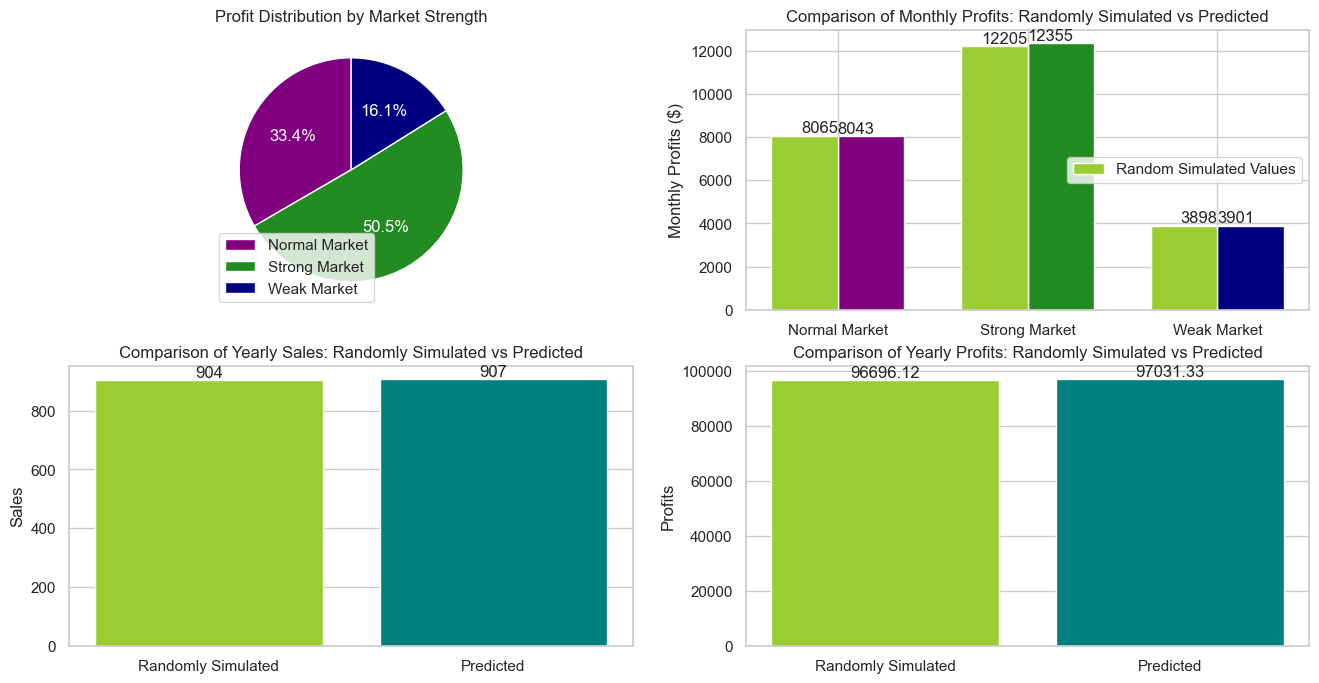

In [23]:
# Calculate average price and standard deviation for normal market
avg_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['Price'].mean().mean()
std_price_normal_market = df[df['Market_Strength'] == 'Normal'].groupby('Month')['Price'].mean().std()

# Calculate mean and standard deviation of prices and sales during strong markets
avg_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['Price'].mean().mean()
std_price_strong_market = df[df['Market_Strength'] == 'Strong'].groupby('Month')['Price'].mean().std()

# Calculate average price and standard deviation for weak market
avg_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['Price'].mean().mean()
std_price_weak_market = df[df['Market_Strength'] == 'Weak'].groupby('Month')['Price'].mean().std()


# Generate 100 random samples for sales count for normal market strengths
random_samples = np.random.normal(loc=mean_sales_normal, scale=std_dev_sales_normal, size=100)
# Generate 100 random samples for sales count for strong market strengths
random_samples_strong = np.random.normal(loc=mean_sales_strong, scale=std_dev_sales_strong, size=100)
# Generate 100 random samples for sales count for weak market strengths
random_samples_weak = np.random.normal(loc=mean_sales_weak, scale=std_dev_sales_weak, size=100)

# Calculate the average of the random samples
avg_random_sales_n = np.mean(random_samples)
avg_random_sales_s = np.mean(random_samples_strong)
avg_random_sales_w = np.mean(random_samples_weak)
print("Average simulated monthly sales for Normal Market Strength:", avg_random_sales_n)
print("Average simulated monthly sales for Strong Market Strength:", avg_random_sales_s)
print("Average simulated monthly sales for Weak Market Strength:", avg_random_sales_w)

normal_stock_values = df[df['Market_Strength'] == 'Normal']['Ideal_Monthly_Inventory']
strong_stock_values = df[(df['Market_Strength'] == 'Strong')]['Ideal_Monthly_Inventory']
weak_stock_values = df[(df['Market_Strength'] == 'Weak')]['Ideal_Monthly_Inventory']

# Generate random value for average price
random_avg_price_n = np.mean(np.random.normal(loc=avg_price_normal_market, scale=std_price_normal_market, size=1000))
random_avg_price_s = np.mean(np.random.normal(loc=avg_price_strong_market, scale=std_price_strong_market, size=1000))
random_avg_price_w = np.mean(np.random.normal(loc=avg_price_weak_market, scale=std_price_weak_market, size=1000))

# Calculate profits
profits1 = 0.5 * random_avg_price_n * avg_random_sales_n
profits2 = 0.5 * random_avg_price_n * normal_stock_values.mean()
profit_n = min(profits1, profits2)
profits3 = 0.5 * random_avg_price_s * avg_random_sales_s
profits4 = 0.5 * random_avg_price_s * strong_stock_values.mean()
profit_s = min(profits3, profits4)
profits5 = 0.5 * random_avg_price_w * avg_random_sales_w
profits6 = 0.5 * random_avg_price_w * weak_stock_values.mean()
profit_w = min(profits5, profits6)

profit_m = ((profit_n * 6) + (profit_s * 3) + (profit_w * 3))/12
profit = (profit_n * 6) + (profit_s * 3) + (profit_w * 3)

# Visualize distribution of key variables
plt.figure(figsize=(16, 8))

# Define colors
colors = {'Normal Market': 'purple', 'Strong Market': 'forestgreen', 'Weak Market': 'navy'}

# Pie chart
profits_by_strength = [profit_n, profit_s, profit_w]
labels = ['Normal Market', 'Strong Market', 'Weak Market']
text_props = {'color': 'white'}  # Set the text color for percentages to white
plt.subplot(2, 2, 1)
plt.pie(profits_by_strength, labels=labels, autopct='%1.1f%%', startangle=90, colors=[colors[label] for label in labels],
        textprops=text_props)
plt.title('Profit Distribution by Market Strength')

# Add legend
plt.legend(labels, loc="lower left")

normal_a = (df[df['Market_Strength'] == 'Normal']['Price'].count() / 6) / 3
strong_a = (df[df['Market_Strength'] == 'Strong']['Price'].count() / 3) / 3
weak_a = (df[df['Market_Strength'] == 'Weak']['Price'].count() / 3) / 3

normal = avg_random_sales_n * random_avg_price_n * 0.5
strong = avg_random_sales_s * random_avg_price_s * 0.5
weak = avg_random_sales_w * random_avg_price_w * 0.5

normal_w = normal_a *  random_avg_price_n * 0.5
strong_w = strong_a * random_avg_price_s * 0.5
weak_w = weak_a * random_avg_price_w * 0.5

profit_pred = (normal_w * 6) + (strong_w * 3) + (weak_w * 3)

# Define data
categories = ['Normal Market', 'Strong Market', 'Weak Market']
values1 = [normal, strong, weak]
values2 = [normal_w, strong_w, weak_w]
colors = {'Normal Market': 'purple', 'Strong Market': 'forestgreen', 'Weak Market': 'navy'}

# Set up positions for bars
positions = np.arange(len(categories))

# Create side-by-side bar charts
width = 0.35
plt.subplot(2, 2, 2)
plt.bar(positions + width/2, values2, width, color=[colors[cat] for cat in categories])
plt.bar(positions - width/2, values1, width, label='Random Simulated Values', color='yellowgreen')

# Add labels and title
plt.ylabel('Monthly Profits ($)')
plt.title('Comparison of Monthly Profits: Randomly Simulated vs Predicted')

# Add legend
plt.legend(loc="center right")

# Add category labels to x-axis
plt.xticks(positions, categories)

# Add data labels on top of bars
for i, value in enumerate(values1):
    plt.text(i, value, f'{value:.0f}', ha='right', va='bottom')

# Add data labels on top of bars
for i, value in enumerate(values2):
    plt.text(i, value, f'{value:.0f}', ha='left', va='bottom')

year_sales_rand = (avg_random_sales_n * 6) + (avg_random_sales_s * 3) + (avg_random_sales_w * 3)
year_sales_pred = (normal_a * 6) + (strong_a * 3) + (weak_a * 3)

# Define data
categories = ['Randomly Simulated', 'Predicted']
values = [year_sales_rand, year_sales_pred]
colors = {'Randomly Simulated': 'yellowgreen', 'Predicted': 'teal'}

# Set up positions for bars
positions = np.arange(len(categories))

# Create bar chart
plt.subplot(2, 2, 3)
plt.bar(positions, values, color=[colors[cat] for cat in categories])

# Add labels and title
#plt.xlabel('Sales Source')
plt.ylabel('Sales')
plt.title('Comparison of Yearly Sales: Randomly Simulated vs Predicted')

# Set x-axis ticks and labels
plt.xticks(positions, categories)

# Add data labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom')

# Define data
categories = ['Randomly Simulated', 'Predicted']
values1 = [profit, profit_pred]

# Create bar chart
plt.subplot(2, 2, 4)
plt.bar(positions, values1, color=[colors[cat] for cat in categories])

# Add labels and title
#plt.xlabel('Sales Source')
plt.ylabel('Profits')
plt.title('Comparison of Yearly Profits: Randomly Simulated vs Predicted')

# Set x-axis ticks and labels
plt.xticks(positions, categories)

# Add data labels on top of bars
for i, value in enumerate(values1):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()